In [1]:
%run ./msgc_experiments_ct_init.ipynb
# the other imports are not necessary

Populating the interactive namespace from numpy and matplotlib


In [2]:
%pylab inline

import sys
import os.path as op
from pathlib import Path
import shutil
# sys.path.insert(0, "/home/mjirik/projects/pyseg_base/")
sys.path.insert(0, op.abspath("../"))

latex_dir = Path("../../papers/cmbbeiv19/tmp/")
dtt.set_output(latex_dir)


# dp_ircad_id = [1, 5, 6, 7, 11, 20]
# dp_keys = ["left_kidney"]

dp_ircad_id_key = [
#     [1, "left_kidney"],
#     [5, "left_kidney"],
#     [6, "left_kidney"],
#     [7, "left_kidney"],
#     [11, "left_kidney"], # asi spatne seedy
#     [20, "left_kidney"], # naposledy padlo
    [1, "right_kidney"], 
    [5, "right_kidney"], # chyba v seedech pro ssgc
    [6, "right_kidney"],
    [7, "right_kidney"], # done
    [11, "right_kidney"],
#     [20, "right_kidney"], # does not work
]

working_voxelsize_mm = None
working_voxelsize_mm = [1.5, 1.5, 1.5]
# working_voxelsize_mm = [1.3, 1.3, 1.3]
# working_voxelsize_mm = [1.7, 1.7, 1.7]
# working_voxelsize_mm = "orig*2"
# working_voxelsize_mm=[2, 2, 2]
# working_voxelsize_mm=[2.2, 2.5, 2.5]

fname = "exp062-multiscale_delme.csv"
fnamenew = "msgc_experiment_ct.csv"

rnd_seed=1

dpi = 400

Populating the interactive namespace from numpy and matplotlib


In [3]:
# dry_run = True
dry_run = False
force_rewrite = False
# force_rewrite = True


# Run experiment

In [4]:
data_seeds_path = Path(io3d.datasets.join_path("medical", "orig", "ircad1b_seeds", get_root=True)) 
d01_pth = data_seeds_path / "ircadb1-01.pklz"

datap = io3d.read(d01_pth)
datap
str(d01_pth)
datap.keys()


dict_keys(['series_number', 'datadir', 'voxelsize_mm', 'version', 'crinfo', 'segmentation', 'apriori', 'slab', 'orig_shape', 'vessel_tree', 'saved_seeds', 'processing_information', 'experiment_caption', 'lisa_operator_identifier', 'data3d'])

In [5]:
# io3d.write(datap, data_seeds_path / "ircad1b01.hdf5")
# io3d.read(data_seeds_path / "ircad1b01.hdf5")

In [6]:
# datap['saved_seeds']["left_kidney"]

In [7]:
# pth_data3d = Path(io3d.datasets.join_path("medical", "orig", "3Dircadb1.{}", "PATIENT_DICOM", get_root=True)) 
# pth_ground_true = Path(io3d.datasets.join_path("medical", "orig", "3Dircadb1.{}", "MASKS_DICOM", "{}"  get_root=True)) 
# pth_seeds = Path(io3d.datasets.join_path("medical", "orig", "ircad1b_seeds", "ircad1b{:02d}.pklz", get_root=True)) 
# print(pth_data3d)
# print(pth_seeds)

In [8]:
#for par in it:
#    print par
i = 0

In [9]:
if op.exists(fname) and not force_rewrite:
    df = pd.read_csv(fname)#, index_col=0)
else:
    df = pd.DataFrame([])
    
if op.exists(fnamenew) and not force_rewrite:
    dfnew = pd.read_csv(fnamenew)#, index_col=0)
else:
    dfnew = pd.DataFrame([])


i = int(len(dfnew) / 3)
np.random.seed(rnd_seed)

import platform
machine_hostname = platform.node()

# it = itertools.product(dp_ircad_id, dp_keys)
# it = itertools.product(dp_ircad_id_key)
it = dp_ircad_id_key
for data_params in it:
# dp_ircad_id = [1, 10, 11]
# dp_keys = ["left_kidney"]
    

    start = time.time()
    img, true_seg, seeds, voxelsize_mm, orig_vs_mm = prepare_data(data_params[0], data_params[1])
    vxmm = voxelsize_mm
    
    fn_dbg_prefix = "{}_{}".format(data_params[0], data_params[1])
    stats0, seg0 = run_gc_with_defined_setup(
        img, segparams0, seeds, true_seg, vxmm, dry_run=dry_run, fn_debug_prefix=fn_dbg_prefix)
    stats1, seg1 = run_gc_with_defined_setup(
        img, segparams1, seeds, true_seg, vxmm, dry_run=dry_run, fn_debug_prefix=fn_dbg_prefix, true_seg2=seg0)
    stats2, seg2 = run_gc_with_defined_setup(
        img, segparams2, seeds, true_seg, vxmm, dry_run=dry_run, fn_debug_prefix=fn_dbg_prefix, true_seg2=seg0)

    
    data_params_dict = dict(zip(["data id", "data organ key"], data_params))
#     stats = merge_stats(stats0, stats1, stats2, labels)
#     stats = add_data_and_algoritm_info(stats, data_params_dict, segparams0, start, seg, voxelsize_mm)
    
#     dfi = pd.DataFrame(stats, index=[i])
    
#     # display(df)
#     df = df.append(dfi, sort=True)
#     df.to_csv(fname, index=False)
    
    dfinew = add_data_seaborn(stats0, data_params_dict, segparams0, start, i, labels[0], true_seg, voxelsize_mm, orig_vs_mm)
    dfnew = dfnew.append(dfinew, sort=True)
    dfinew = add_data_seaborn(stats1, data_params_dict, segparams1, start, i, labels[1], true_seg, voxelsize_mm, orig_vs_mm)
    dfnew = dfnew.append(dfinew, sort=True)
    dfinew = add_data_seaborn(stats2, data_params_dict, segparams2, start, i, labels[2], true_seg, voxelsize_mm, orig_vs_mm)
    dfnew = dfnew.append(dfinew, sort=True)
    
    dfnew.to_csv(fnamenew, index=False)
    
    i += 1
    

#     plt.figure(figsize=[10,15])
#     sed3.show_slices(img, contour=sg1, seeds=seeds, slice_step=10)
#     plt.figure(figsize=[10,15])
#     sed3.show_slices(img, contour=sg2, seeds=seeds, slice_step=10)

Unable to read dicom file dicomdir.pkl
File is missing DICOM File Meta Information header or the 'DICM' prefix is missing from the header. Use force=True to force reading.


C:\Users\Jirik\data\medical\orig\3Dircadb1.1\PATIENT_DICOM
C:\Users\Jirik\data\medical\orig\3Dircadb1.1\MASKS_DICOM\rightkidney
C:\Users\Jirik\data\medical\orig\ircad1b_seeds\ircadb1-01.pklz


Unable to read dicom file dicomdir.pkl
File is missing DICOM File Meta Information header or the 'DICM' prefix is missing from the header. Use force=True to force reading.


segparams:  {'method': 'graphcut', 'pairwise_alpha': 13.333333333333334, 'use_boundary_penalties': True, 'boundary_penalties_sigma': 200, 'boundary_penalties_weight': 1, 'return_only_object_with_seeds': True, 'use_old_similarity': True, 'use_extra_features_for_training': False, 'use_apriori_if_available': True, 'apriori_gamma': 0.1, 'boundary_dilatation_distance': 2, 'block_size': 10, 'tile_zoom_constant': 1, 'pairwise_alpha_per_square_unit': 45}
modelparams:  {'type': 'gmmsame', 'params': {'covariance_type': 'full'}, 'fv_type': 'intensity'}
unique true seg: [  0 255], unique sg1: [0 1]
segparams:  {'boundary_dilatation_distance': 2, 'block_size': 10, 'use_boundary_penalties': True, 'boundary_penalties_weight': 1, 'tile_zoom_constant': 1, 'method': 'multiscale_graphcut_hi2lo', 'pairwise_alpha': 13.333333333333334, 'boundary_penalties_sigma': 200, 'return_only_object_with_seeds': True, 'use_old_similarity': True, 'use_extra_features_for_training': False, 'use_apriori_if_available': True

Unable to read dicom file dicomdir.pkl
File is missing DICOM File Meta Information header or the 'DICM' prefix is missing from the header. Use force=True to force reading.


C:\Users\Jirik\data\medical\orig\3Dircadb1.5\PATIENT_DICOM
C:\Users\Jirik\data\medical\orig\3Dircadb1.5\MASKS_DICOM\rightkidney
C:\Users\Jirik\data\medical\orig\ircad1b_seeds\ircadb1-05.pklz


Unable to read dicom file dicomdir.pkl
File is missing DICOM File Meta Information header or the 'DICM' prefix is missing from the header. Use force=True to force reading.


segparams:  {'method': 'graphcut', 'pairwise_alpha': 13.333333333333334, 'use_boundary_penalties': True, 'boundary_penalties_sigma': 200, 'boundary_penalties_weight': 1, 'return_only_object_with_seeds': True, 'use_old_similarity': True, 'use_extra_features_for_training': False, 'use_apriori_if_available': True, 'apriori_gamma': 0.1, 'boundary_dilatation_distance': 2, 'block_size': 10, 'tile_zoom_constant': 1, 'pairwise_alpha_per_square_unit': 45}
modelparams:  {'type': 'gmmsame', 'params': {'covariance_type': 'full'}, 'fv_type': 'intensity'}
unique true seg: [  0 255], unique sg1: [0 1]


C:\Users\Jirik\Miniconda3\envs\lisa\lib\site-packages\scipy\ndimage\interpolation.py:583: UserWarning: From scipy 0.13.0, the output shape of zoom() is calculated with round() instead of int() - for these inputs the size of the returned array has changed.
  "the returned array has changed.", UserWarning)


segparams:  {'boundary_dilatation_distance': 2, 'block_size': 10, 'use_boundary_penalties': True, 'boundary_penalties_weight': 1, 'tile_zoom_constant': 1, 'method': 'multiscale_graphcut_hi2lo', 'pairwise_alpha': 13.333333333333334, 'boundary_penalties_sigma': 200, 'return_only_object_with_seeds': True, 'use_old_similarity': True, 'use_extra_features_for_training': False, 'use_apriori_if_available': True, 'apriori_gamma': 0.1, 'pairwise_alpha_per_square_unit': 45}
modelparams:  {'type': 'gmmsame', 'params': {'covariance_type': 'full'}, 'fv_type': 'intensity'}
unique true seg: [  0 255], unique sg1: [0 1]
segparams:  {'boundary_dilatation_distance': 2, 'block_size': 10, 'use_boundary_penalties': True, 'boundary_penalties_weight': 1, 'tile_zoom_constant': 1, 'method': 'multiscale_graphcut_lo2hi', 'pairwise_alpha': 13.333333333333334, 'boundary_penalties_sigma': 200, 'return_only_object_with_seeds': True, 'use_old_similarity': True, 'use_extra_features_for_training': False, 'use_apriori_if

Unable to read dicom file dicomdir.pkl
File is missing DICOM File Meta Information header or the 'DICM' prefix is missing from the header. Use force=True to force reading.


C:\Users\Jirik\data\medical\orig\3Dircadb1.6\PATIENT_DICOM
C:\Users\Jirik\data\medical\orig\3Dircadb1.6\MASKS_DICOM\rightkidney
C:\Users\Jirik\data\medical\orig\ircad1b_seeds\ircadb1-06.pklz


Unable to read dicom file dicomdir.pkl
File is missing DICOM File Meta Information header or the 'DICM' prefix is missing from the header. Use force=True to force reading.


segparams:  {'method': 'graphcut', 'pairwise_alpha': 13.333333333333334, 'use_boundary_penalties': True, 'boundary_penalties_sigma': 200, 'boundary_penalties_weight': 1, 'return_only_object_with_seeds': True, 'use_old_similarity': True, 'use_extra_features_for_training': False, 'use_apriori_if_available': True, 'apriori_gamma': 0.1, 'boundary_dilatation_distance': 2, 'block_size': 10, 'tile_zoom_constant': 1, 'pairwise_alpha_per_square_unit': 45}
modelparams:  {'type': 'gmmsame', 'params': {'covariance_type': 'full'}, 'fv_type': 'intensity'}
unique true seg: [  0 255], unique sg1: [0 1]
segparams:  {'boundary_dilatation_distance': 2, 'block_size': 10, 'use_boundary_penalties': True, 'boundary_penalties_weight': 1, 'tile_zoom_constant': 1, 'method': 'multiscale_graphcut_hi2lo', 'pairwise_alpha': 13.333333333333334, 'boundary_penalties_sigma': 200, 'return_only_object_with_seeds': True, 'use_old_similarity': True, 'use_extra_features_for_training': False, 'use_apriori_if_available': True

Unable to read dicom file dicomdir.pkl
File is missing DICOM File Meta Information header or the 'DICM' prefix is missing from the header. Use force=True to force reading.


C:\Users\Jirik\data\medical\orig\3Dircadb1.7\PATIENT_DICOM
C:\Users\Jirik\data\medical\orig\3Dircadb1.7\MASKS_DICOM\rightkidney
C:\Users\Jirik\data\medical\orig\ircad1b_seeds\ircadb1-07.pklz


Unable to read dicom file dicomdir.pkl
File is missing DICOM File Meta Information header or the 'DICM' prefix is missing from the header. Use force=True to force reading.


segparams:  {'method': 'graphcut', 'pairwise_alpha': 13.333333333333334, 'use_boundary_penalties': True, 'boundary_penalties_sigma': 200, 'boundary_penalties_weight': 1, 'return_only_object_with_seeds': True, 'use_old_similarity': True, 'use_extra_features_for_training': False, 'use_apriori_if_available': True, 'apriori_gamma': 0.1, 'boundary_dilatation_distance': 2, 'block_size': 10, 'tile_zoom_constant': 1, 'pairwise_alpha_per_square_unit': 45}
modelparams:  {'type': 'gmmsame', 'params': {'covariance_type': 'full'}, 'fv_type': 'intensity'}
unique true seg: [  0 255], unique sg1: [0 1]
segparams:  {'boundary_dilatation_distance': 2, 'block_size': 10, 'use_boundary_penalties': True, 'boundary_penalties_weight': 1, 'tile_zoom_constant': 1, 'method': 'multiscale_graphcut_hi2lo', 'pairwise_alpha': 13.333333333333334, 'boundary_penalties_sigma': 200, 'return_only_object_with_seeds': True, 'use_old_similarity': True, 'use_extra_features_for_training': False, 'use_apriori_if_available': True

Unable to read dicom file dicomdir.pkl
File is missing DICOM File Meta Information header or the 'DICM' prefix is missing from the header. Use force=True to force reading.


C:\Users\Jirik\data\medical\orig\3Dircadb1.11\PATIENT_DICOM
C:\Users\Jirik\data\medical\orig\3Dircadb1.11\MASKS_DICOM\rightkidney
C:\Users\Jirik\data\medical\orig\ircad1b_seeds\ircadb1-11.pklz


Unable to read dicom file dicomdir.pkl
File is missing DICOM File Meta Information header or the 'DICM' prefix is missing from the header. Use force=True to force reading.


segparams:  {'method': 'graphcut', 'pairwise_alpha': 13.333333333333334, 'use_boundary_penalties': True, 'boundary_penalties_sigma': 200, 'boundary_penalties_weight': 1, 'return_only_object_with_seeds': True, 'use_old_similarity': True, 'use_extra_features_for_training': False, 'use_apriori_if_available': True, 'apriori_gamma': 0.1, 'boundary_dilatation_distance': 2, 'block_size': 10, 'tile_zoom_constant': 1, 'pairwise_alpha_per_square_unit': 45}
modelparams:  {'type': 'gmmsame', 'params': {'covariance_type': 'full'}, 'fv_type': 'intensity'}
unique true seg: [  0 255], unique sg1: [0 1]
segparams:  {'boundary_dilatation_distance': 2, 'block_size': 10, 'use_boundary_penalties': True, 'boundary_penalties_weight': 1, 'tile_zoom_constant': 1, 'method': 'multiscale_graphcut_hi2lo', 'pairwise_alpha': 13.333333333333334, 'boundary_penalties_sigma': 200, 'return_only_object_with_seeds': True, 'use_old_similarity': True, 'use_extra_features_for_training': False, 'use_apriori_if_available': True

In [10]:
stats0

{'tlinks shape': [(8532756, 2)],
 'nlinks shape': [(25468380, 3)],
 '_create_nlinks time': 4.851342439651489,
 'gc time': 40.20048213005066,
 'time': 48.61592483520508,
 'error': 4885,
 'data segmentation size px': 37457,
 'data size px': 8532756,
 'volume1_mm3': 126417.375,
 'volume2_mm3': 142789.5,
 'err1_mm3': 57.375,
 'err2_mm3': 16429.5,
 'err1_percent': 0.042625211558954428,
 'err2_percent': 12.205854698175891,
 'vd': 12.950850308353578,
 'voe': 11.541642055522738,
 'avgd': 0.85724955302278727,
 'rmsd': 3.7308913206916716,
 'maxd': 12.278029157808675,
 'dice': 0.061242399548674276,
 'jaccard': 0.88458357944477262}

In [11]:
label = labels[0]
stats = process_gc_stats(stats0, "")
stats = add_data_and_algoritm_info(stats, data_params_dict, segparams0, start, true_seg, voxelsize_mm, orig_vs_mm)
stats["method"] = label

In [12]:
stats

{'_create_nlinks time': 4.851342439651489,
 'gc time': 40.20048213005066,
 'time': 48.61592483520508,
 'error': 4885,
 'data segmentation size px': 37457,
 'data size px': 8532756,
 'volume1_mm3': 126417.375,
 'volume2_mm3': 142789.5,
 'err1_mm3': 57.375,
 'err2_mm3': 16429.5,
 'err1_percent': 0.042625211558954428,
 'err2_percent': 12.205854698175891,
 'vd': 12.950850308353578,
 'voe': 11.541642055522738,
 'avgd': 0.85724955302278727,
 'rmsd': 3.7308913206916716,
 'maxd': 12.278029157808675,
 'dice': 0.061242399548674276,
 'jaccard': 0.88458357944477262,
 'nlinks number': 25468380,
 'tlinks number': 8532756,
 'edge number': 34001136,
 'data id': 11,
 'data organ key': 'right_kidney',
 'data size 0': 141,
 'data size 1': 246,
 'data size 2': 246,
 'data target size px': 42308,
 'data voxesize mm^3': 3.375,
 'data voxesize mm 0': 1.5,
 'data voxesize mm 1': 1.5,
 'data voxesize mm 2': 1.5,
 'data orig voxesize mm 0': 1.600000023841858,
 'data orig voxesize mm 1': 0.720000028610229,
 'dat

In [13]:
data_params

[11, 'right_kidney']

In [14]:


dfinew = pd.DataFrame(stats, index=[i*3 + 0])

In [15]:
len(dfnew) / 3

10.0

In [16]:
it = itertools.product(dp_ircad_id_key)
list(it)

[([1, 'right_kidney'],),
 ([5, 'right_kidney'],),
 ([6, 'right_kidney'],),
 ([7, 'right_kidney'],),
 ([11, 'right_kidney'],)]

In [17]:
np.unique(seeds)

array([0, 1, 2], dtype=uint8)

In [18]:
i

10

In [19]:
# export all to latex
dtt.save(dfnew, "raw_table")

'\\begin{tabular}{rrrrlrrrrrrrrrrrrrrrrrrrrrrrrrrrlrlrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrr}\n\\toprule\n \\_create\\_nlinks time &      avgd &  block size &  data id & data organ key &  data orig voxesize mm 0 &  data orig voxesize mm 1 &  data orig voxesize mm 2 &  data segmentation size px &  data size 0 &  data size 1 &  data size 2 &  data size px &  data target size px &  data voxesize mm 0 &  data voxesize mm 1 &  data voxesize mm 2 &  data voxesize mm\\textasciicircum 3 &      dice &   dice gc &  edge number &  err1\\_mm3 &  err1\\_percent &   err2\\_mm3 &  err2\\_percent &  error &  experiment iteration start time &    gc time &   jaccard &  jaccard gc &  low level image voxels &  low level object voxels & machine hostname &       maxd &       method &  nlinks number &       rmsd &  t graph 01 &  t graph 10 &  t graph 11 &  t graph 13 &  t graph 14 &  t graph high &  t graph low &  t split 01 &  t split 02 &  t split 03 &  t split 04 &  t split 05 &  t split 06 &  t split 

In [20]:
stats0

{'tlinks shape': [(8532756, 2)],
 'nlinks shape': [(25468380, 3)],
 '_create_nlinks time': 4.851342439651489,
 'gc time': 40.20048213005066,
 'time': 48.61592483520508,
 'error': 4885,
 'data segmentation size px': 37457,
 'data size px': 8532756,
 'volume1_mm3': 126417.375,
 'volume2_mm3': 142789.5,
 'err1_mm3': 57.375,
 'err2_mm3': 16429.5,
 'err1_percent': 0.042625211558954428,
 'err2_percent': 12.205854698175891,
 'vd': 12.950850308353578,
 'voe': 11.541642055522738,
 'avgd': 0.85724955302278727,
 'rmsd': 3.7308913206916716,
 'maxd': 12.278029157808675,
 'dice': 0.061242399548674276,
 'jaccard': 0.88458357944477262}

In [21]:
# gc

# Data processing graphs, statistics

In [22]:
df = pd.read_csv(fnamenew)
df.rename(columns={"msgc time": "MSGC time"})
# dfs = df[(df["data seedsz"]==3) & (df["data offset"] == 3) & (df["data radius"] == 10)]
# dfs_plus = dfs[dfs['data size'] > 160]
dfs = df

import seaborn as sns
sns.set_context("paper")
sns.set_style("white")

In [23]:
dfs.keys()

Index(['_create_nlinks time', 'avgd', 'block size', 'data id',
       'data organ key', 'data orig voxesize mm 0', 'data orig voxesize mm 1',
       'data orig voxesize mm 2', 'data segmentation size px', 'data size 0',
       'data size 1', 'data size 2', 'data size px', 'data target size px',
       'data voxesize mm 0', 'data voxesize mm 1', 'data voxesize mm 2',
       'data voxesize mm^3', 'dice', 'dice gc', 'edge number', 'err1_mm3',
       'err1_percent', 'err2_mm3', 'err2_percent', 'error',
       'experiment iteration start time', 'gc time', 'jaccard', 'jaccard gc',
       'low level image voxels', 'low level object voxels', 'machine hostname',
       'maxd', 'method', 'nlinks number', 'rmsd', 't graph 01', 't graph 10',
       't graph 11', 't graph 13', 't graph 14', 't graph high', 't graph low',
       't split 01', 't split 02', 't split 03', 't split 04', 't split 05',
       't split 06', 't split 07', 't split 08', 't split 081', 't split 082',
       't split 0821', '

In [24]:
# pd.set_option('display.height', 1000)
# pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
# pd.set_option('display.width', 1000)

dfs

,_create_nlinks time,avgd,block size,data id,data organ key,data orig voxesize mm 0,data orig voxesize mm 1,data orig voxesize mm 2,data segmentation size px,data size 0,data size 1,data size 2,data size px,data target size px,data voxesize mm 0,data voxesize mm 1,data voxesize mm 2,data voxesize mm^3,dice,dice gc,edge number,err1_mm3,err1_percent,err2_mm3,err2_percent,error,experiment iteration start time,gc time,jaccard,jaccard gc,low level image voxels,low level object voxels,machine hostname,maxd,method,nlinks number,rmsd,t graph 01,t graph 10,t graph 11,t graph 13,t graph 14,t graph high,t graph low,t split 01,t split 02,t split 03,t split 04,t split 05,t split 06,t split 07,t split 08,t split 081,t split 082,t split 0821,t split 09,t split 10,t1,t10,t2,t3,t3.1,t3.2,t3.3,t4,t5,t6,t7,t8,t9,time,tlinks number,vd,voe,voe gc,volume1_mm3,volume2_mm3
0,2.698244,2.307930,10,1,left_kidney,1.6,0.570,0.570,29609,138,195,195,5247450,43413,1.5,1.5,1.5,3.375,0.189094,NaN,20897955,6.750,0.005478,46595.250,37.813262,13808,1.559472e+09,24.595996,0.681953,NaN,NaN,NaN,genomnote4,13.747727,ssgc,15650505,10.266311,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29.749289,5247450,46.620960,31.804676,NaN,99930.375,146518.875
1,1.175025,1.854668,10,1,left_kidney,1.6,0.570,0.570,30919,138,195,195,5247450,43413,1.5,1.5,1.5,3.375,0.168084,0.049993,3028263,0.000,0.000000,42167.250,33.616746,12494,1.559472e+09,3.133238,0.712206,0.904774,5600.0,20.0,genomnote4,12.903488,msgc_hi2lo,2276742,7.849113,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.003505,24.027027,0.155903,0.162351,NaN,NaN,NaN,1.088386,2.307553,6.804336,9.119133,20.867005,20.893789,24.819139,751521,40.408810,28.779398,9.522611,104351.625,146518.875
2,0.002976,1.854668,10,1,left_kidney,1.6,0.570,0.570,30919,138,195,195,5247450,43413,1.5,1.5,1.5,3.375,0.168084,0.049993,3044650,0.000,0.000000,42167.250,33.616746,12494,1.559472e+09,2.818764,0.712206,0.904774,5600.0,22.0,genomnote4,12.903488,msgc_lo2hi,2289195,7.849113,0.050593,0.052577,0.054065,26.574730,26.740391,26.437762,0.075953,0.000496,0.015341,0.022252,0.051051,0.054026,0.108993,0.167053,9.667482,0.0,0.0,0.0,17.461370,25.424738,0.030713,32.303499,0.168642,0.171081,0.171081,0.226632,26.914447,26.914447,29.034354,29.437603,29.437603,NaN,29.484735,32.944820,755455,40.408810,28.779398,9.522611,104351.625,146518.875
3,7.767864,2.991992,10,5,left_kidney,1.6,0.782,0.782,43498,149,267,267,10622061,64610,1.5,1.5,1.5,3.375,0.195767,NaN,42337389,87.750,0.048100,71340.750,39.105339,21164,1.559472e+09,76.445437,0.672566,NaN,NaN,NaN,genomnote4,15.945219,ssgc,31715328,17.703387,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,88.737358,10622061,48.535565,32.743363,NaN,146805.750,218058.750
4,2.395186,2.365609,10,5,left_kidney,1.6,0.782,0.782,45322,149,267,267,10622061,64610,1.5,1.5,1.5,3.375,0.175490,0.049403,3625628,6.750,0.003639,65103.750,35.094422,19292,1.559472e+09,3.543429,0.701418,0.905845,10935.0,26.0,genomnote4,15.945219,msgc_hi2lo,2725151,14.004058,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,46.573639,0.292111,0.297567,NaN,NaN,NaN,2.115412,4.594917,13.907826,16.114039,42.984083,43.030210,47.859365,900477,42.557698,29.858231,9.415501,152961.750,218058.750
5,0.004464,2.365609,10,5,left_kidney,1.6,0.782,0.782,45322,149,267,267,10622061,64610,1.5,1.5,1.5,3.375,0.175490,0.049403,3303540,6.750,0.003639,65103.750,35.094422,19292,1.559472e+09,2.480003,0.701418,0.905845,10935.0,23.0,genomnote4,15.945219,msgc_lo2hi,2483469,14.004058,0.036209,0.038688,0.039185,22.692034,22.855217,22.512997,0.131935,0.001033,0.005995,0.008972,0.045053,0.047529,0.095994,0.143079,8.737543,0.0,0.0,0.0,15.207744,21.603584,0.054573,29.844826,0.322367,0.326335,0.326335,0.365520,23.182048,23.182048,26.482437,27.293401,27.293401,NaN,

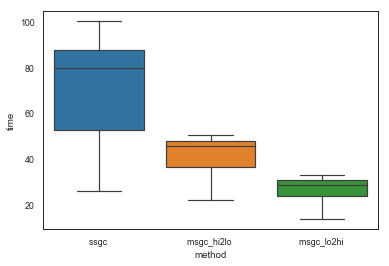

In [25]:
sns.boxplot(data=df, y="time", x="method")

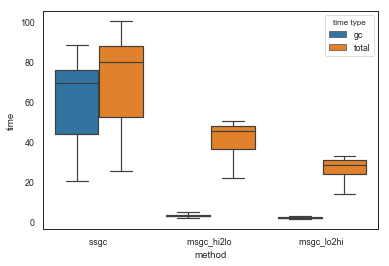

In [26]:
uu = pd.melt(df.rename(columns={"gc time": "gc", "time": "total"}), value_vars=["gc", "total"], id_vars=["method"], var_name="time type", value_name="time")
sns.boxplot(data=uu, hue="time type",y="time", x="method")
plt.savefig(op.join(latex_dir, "msgc_time_boxplot_ct.pdf"), dpi=1000)

In [27]:
# uu["method"] == "msgc_lo2hi"
uu[uu["method"] == "msgc_lo2hi "]


,method,time type,time
2,msgc_lo2hi,gc,2.818764
5,msgc_lo2hi,gc,2.480003
8,msgc_lo2hi,gc,2.147149
11,msgc_lo2hi,gc,2.023156
14,msgc_lo2hi,gc,1.656101
17,msgc_lo2hi,gc,1.598118
20,msgc_lo2hi,gc,2.383239
23,msgc_lo2hi,gc,2.029677
26,msgc_lo2hi,gc,1.907481
29,msgc_lo2hi,gc,2.042529


In [28]:
table = pd.pivot_table(
    dfs, values=['gc time', 'time', "t3", "t4", "t5", "t6", "t7", "t8"], index=['method'], 
    aggfunc={'gc time': np.mean, 'time': [np.mean, min, max], "t3": np.mean,"t4": np.mean, "t5": np.mean, "t6": np.mean, "t7": np.mean, "t8": np.mean}
)
table

gc time        t3         t4         t5         t6         t7  \
                  mean      mean       mean       mean       mean       mean   
method                                                                         
msgc_hi2lo    3.153388  0.264475   1.944191   4.139444  12.256542  14.414593   
msgc_lo2hi    2.108622  0.303001  19.600569  22.790854  23.378279  23.378279   
ssgc         59.465264       NaN        NaN        NaN        NaN        NaN   

                   t8        time                        
                 mean         max       mean        min  
method                                                   
msgc_hi2lo   36.30446   50.101531  40.685013  21.865783  
msgc_lo2hi        NaN   32.944820  26.681292  13.644483  
ssgc              NaN  100.232490  69.411109  25.579485

In [29]:
table = pd.pivot_table(
    dfs, values=['gc time', 'time', "t2", "t3", "t3.1", "t3.2", "t3.3", "t4", "t5", "t6", "t7", "t8", "low level image voxels", "low level object voxels"], index=['method'], 
    aggfunc=np.min
)
table

,gc time,low level image voxels,low level object voxels,t2,t3,t3.1,t3.2,t3.3,t4,t5,t6,t7,t8,time
method,,,,,,,,,,,,,,
msgc_hi2lo,2.128834,5600.0,15.0,0.143840,0.146816,NaN,NaN,NaN,1.017793,2.152148,6.137018,7.697938,19.120913,21.865783
msgc_lo2hi,1.598118,5600.0,14.0,0.165664,0.167648,0.167648,0.200383,9.441375,9.441375,11.085120,11.400114,11.400114,NaN,13.644483
ssgc,20.172845,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25.579485


In [30]:
table = pd.pivot_table(
    dfs, values=['gc time', 'time', "t graph 01", "t graph 10", "t graph 11", "t graph 13", "t graph 14", "low level image voxels", "low level object voxels"], index=['method'], 
    aggfunc=np.mean
)
table

,gc time,low level image voxels,low level object voxels,t graph 01,t graph 10,t graph 11,t graph 13,t graph 14,time
method,,,,,,,,,
msgc_hi2lo,3.153388,9847.6,25.2,NaN,NaN,NaN,NaN,NaN,40.685013
msgc_lo2hi,2.108622,9847.6,23.6,0.036902,0.038841,0.039537,19.137377,19.295093,26.681292
ssgc,59.465264,NaN,NaN,NaN,NaN,NaN,NaN,NaN,69.411109


In [31]:
table = pd.pivot_table(
    dfs, values=[
        'gc time', 'time',  
        "t graph low",
        "t graph high",
        "t split 01",
        "t split 02",
        "t split 03",
        "t split 04",
        "t split 05",
        "t split 06",
        "t split 07",
        "t split 08",
        "t split 081",
        "t split 082",
        "t split 09",
        "t split 10",
        "low level image voxels", "low level object voxels"], index=['method'], 
    aggfunc=np.mean
)
table

,gc time,low level image voxels,low level object voxels,t graph high,t graph low,t split 01,t split 02,t split 03,t split 04,t split 05,t split 06,t split 07,t split 08,t split 081,t split 082,t split 09,t split 10,time
method,,,,,,,,,,,,,,,,,,
msgc_hi2lo,3.153388,9847.6,25.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.685013
msgc_lo2hi,2.108622,9847.6,23.6,18.98297,0.109808,0.000302,0.004804,0.007981,0.03474,0.03686,0.079412,0.119202,7.297716,0.0,0.0,12.796613,18.20837,26.681292
ssgc,59.465264,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,69.411109


In [32]:
dfs.keys()

Index(['_create_nlinks time', 'avgd', 'block size', 'data id',
       'data organ key', 'data orig voxesize mm 0', 'data orig voxesize mm 1',
       'data orig voxesize mm 2', 'data segmentation size px', 'data size 0',
       'data size 1', 'data size 2', 'data size px', 'data target size px',
       'data voxesize mm 0', 'data voxesize mm 1', 'data voxesize mm 2',
       'data voxesize mm^3', 'dice', 'dice gc', 'edge number', 'err1_mm3',
       'err1_percent', 'err2_mm3', 'err2_percent', 'error',
       'experiment iteration start time', 'gc time', 'jaccard', 'jaccard gc',
       'low level image voxels', 'low level object voxels', 'machine hostname',
       'maxd', 'method', 'nlinks number', 'rmsd', 't graph 01', 't graph 10',
       't graph 11', 't graph 13', 't graph 14', 't graph high', 't graph low',
       't split 01', 't split 02', 't split 03', 't split 04', 't split 05',
       't split 06', 't split 07', 't split 08', 't split 081', 't split 082',
       't split 0821', '